Download the News Category dataset from here: https://metatext.io/datasets/news-category-dataset then upload it to your google drive in a folder called "datasets"

In [1]:
file_path = r'C:\Users\Lenovo\Downloads\NLP task\News_Category_Dataset_v3.json'

In [2]:
import json
from collections import Counter

def count_and_sort_news_by_category(file_path):
    """
    Count and sort the number of news articles in each category.
    
    Args:
        file_path (str): Path to the JSON file containing the news data.
    
    Returns:
        list: A sorted list of tuples (category, count) in descending order.
    """
    # Read the news items from the file
    news = []
    with open(file_path, 'r') as file:
        for line in file:
            json_object = json.loads(line)
            news.append(json_object)
    
    # Extract categories
    categories = [item['category'] for item in news if 'category' in item]
    
    # Count occurrences of each category
    category_counts = Counter(categories)
    
    # Sort the categories by count in descending order
    sorted_categories = sorted(category_counts.items(), key=lambda x: x[1], reverse=True)
    
    return sorted_categories

# Path to your dataset file
file_path = "News_Category_Dataset_v3.json"  # Replace with your actual file path

# Count and sort the news articles by category
sorted_category_counts = count_and_sort_news_by_category(file_path)
w=[]
# Print the results
print("Number of news articles in each category (sorted):")
for category, count in sorted_category_counts:
    w.append(count)
    print(f"{category}: {count}")
print(w)

Number of news articles in each category (sorted):
POLITICS: 35602
WELLNESS: 17945
ENTERTAINMENT: 17362
TRAVEL: 9900
STYLE & BEAUTY: 9814
PARENTING: 8791
HEALTHY LIVING: 6694
QUEER VOICES: 6347
FOOD & DRINK: 6340
BUSINESS: 5992
COMEDY: 5400
SPORTS: 5077
BLACK VOICES: 4583
HOME & LIVING: 4320
PARENTS: 3955
THE WORLDPOST: 3664
WEDDINGS: 3653
WOMEN: 3572
CRIME: 3562
IMPACT: 3484
DIVORCE: 3426
WORLD NEWS: 3299
MEDIA: 2944
WEIRD NEWS: 2777
GREEN: 2622
WORLDPOST: 2579
RELIGION: 2577
STYLE: 2254
SCIENCE: 2206
TECH: 2104
TASTE: 2096
MONEY: 1756
ARTS: 1509
ENVIRONMENT: 1444
FIFTY: 1401
GOOD NEWS: 1398
U.S. NEWS: 1377
ARTS & CULTURE: 1339
COLLEGE: 1144
LATINO VOICES: 1130
CULTURE & ARTS: 1074
EDUCATION: 1014
[35602, 17945, 17362, 9900, 9814, 8791, 6694, 6347, 6340, 5992, 5400, 5077, 4583, 4320, 3955, 3664, 3653, 3572, 3562, 3484, 3426, 3299, 2944, 2777, 2622, 2579, 2577, 2254, 2206, 2104, 2096, 1756, 1509, 1444, 1401, 1398, 1377, 1339, 1144, 1130, 1074, 1014]


In [3]:
import json
from collections import defaultdict, Counter

def process_file(file_path, limit=22000, min_samples_per_category=30, max_samples_per_category=1000):
    """
    Processes the file to filter and balance news articles by category.
    
    Args:
        file_path (str): Path to the JSON file containing the news data.
        limit (int): Total number of samples to process.
        min_samples_per_category (int): Minimum number of samples per category.
        max_samples_per_category (int): Maximum number of samples per category.
    
    Returns:
        list: List of valid news articles meeting the criteria.
    """
    # Read the news items from the file
    news = []
    with open(file_path, 'r') as file:
        for line in file:
            json_object = json.loads(line)
            news.append(json_object)
    
    # Group news by category
    categorized_news = defaultdict(list)
    for item in news:
        category = item.get('category')
        if category:
            categorized_news[category].append(item)
    
    # Only include categories with at least `min_samples_per_category` articles and limit to `max_samples_per_category`
    valid_news = []
    for category, items in categorized_news.items():
        if len(items) >= min_samples_per_category:
            sampled_items = items[:max_samples_per_category]  # Limit to max samples per category
            valid_news.extend(sampled_items)
    
    # Limit the total number of news articles to `limit`
    if len(valid_news) > limit:
        valid_news = valid_news[:limit]  # Slice to ensure the limit is not exceeded
    
    return valid_news

# Path to your dataset file
file_path = "News_Category_Dataset_v3.json"  # Replace with your actual file path
q = []

# Process the file with the new parameters
news = process_file(file_path, limit=22000, min_samples_per_category=30, max_samples_per_category=1000)

# Display the results
print(f"Number of news items processed: {len(news)}")
category_counts = Counter([item['category'] for item in news])
print("Category counts after filtering:")
for category, count in category_counts.items():
    q.append(count)
    print(f"{category}: {count}")
print(q)


Number of news items processed: 22000
Category counts after filtering:
U.S. NEWS: 1000
COMEDY: 1000
PARENTING: 1000
WORLD NEWS: 1000
CULTURE & ARTS: 1000
TECH: 1000
SPORTS: 1000
ENTERTAINMENT: 1000
POLITICS: 1000
WEIRD NEWS: 1000
ENVIRONMENT: 1000
EDUCATION: 1000
CRIME: 1000
SCIENCE: 1000
WELLNESS: 1000
BUSINESS: 1000
STYLE & BEAUTY: 1000
FOOD & DRINK: 1000
MEDIA: 1000
QUEER VOICES: 1000
HOME & LIVING: 1000
WOMEN: 1000
[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]


In [5]:
news[1200]

{'link': 'https://www.huffpost.com/entry/bill-maher-fox-news-migrant-caravan_n_5bd407a4e4b055bc948c103f',
 'headline': 'Bill Maher Shreds Fox News’ Coverage Of The Migrant Caravan',
 'category': 'COMEDY',
 'short_description': '"Can\'t we be a little kinder?"',
 'authors': 'Lee Moran',
 'date': '2018-10-27'}

In [6]:
text_cat_pairs = []

for news_item in news:
    headline = news_item.get("headline")
    short_description = news_item.get("short_description")
    text = headline + " || " + short_description
    category = news_item.get("category")
    text_cat_pairs.append((text, category))

text_cat_pairs[:5]

[('Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters || Health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the U.S. ordered for the fall.',
  'U.S. NEWS'),
 ("American Airlines Flyer Charged, Banned For Life After Punching Flight Attendant On Video || He was subdued by passengers and crew when he fled to the back of the aircraft after the confrontation, according to the U.S. attorney's office in Los Angeles.",
  'U.S. NEWS'),
 ('Woman Who Called Cops On Black Bird-Watcher Loses Lawsuit Against Ex-Employer || Amy Cooper accused investment firm Franklin Templeton of unfairly firing her and branding her a racist after video of the Central Park encounter went viral.',
  'U.S. NEWS'),
 ('Cleaner Was Dead In Belk Bathroom For 4 Days Before Body Found: Police || The 63-year-old woman was seen working at the South Carolina store on Thursday. She was found dead Monday after her family reported he

In [7]:
# iterate over text_cat_pairs, which is a list of tuples. Looks at the second element in the tuple. Generate a label_to_index dict and an index_to_label dict from those labels.

label_to_index = {}
index_to_label = {}
i = 0

for (_, label) in text_cat_pairs:
    if label not in label_to_index:
        label_to_index[label] = i
        index_to_label[i] = label
        i += 1

In [8]:
label_to_index

{'U.S. NEWS': 0,
 'COMEDY': 1,
 'PARENTING': 2,
 'WORLD NEWS': 3,
 'CULTURE & ARTS': 4,
 'TECH': 5,
 'SPORTS': 6,
 'ENTERTAINMENT': 7,
 'POLITICS': 8,
 'WEIRD NEWS': 9,
 'ENVIRONMENT': 10,
 'EDUCATION': 11,
 'CRIME': 12,
 'SCIENCE': 13,
 'WELLNESS': 14,
 'BUSINESS': 15,
 'STYLE & BEAUTY': 16,
 'FOOD & DRINK': 17,
 'MEDIA': 18,
 'QUEER VOICES': 19,
 'HOME & LIVING': 20,
 'WOMEN': 21}

In [9]:
index_to_label

{0: 'U.S. NEWS',
 1: 'COMEDY',
 2: 'PARENTING',
 3: 'WORLD NEWS',
 4: 'CULTURE & ARTS',
 5: 'TECH',
 6: 'SPORTS',
 7: 'ENTERTAINMENT',
 8: 'POLITICS',
 9: 'WEIRD NEWS',
 10: 'ENVIRONMENT',
 11: 'EDUCATION',
 12: 'CRIME',
 13: 'SCIENCE',
 14: 'WELLNESS',
 15: 'BUSINESS',
 16: 'STYLE & BEAUTY',
 17: 'FOOD & DRINK',
 18: 'MEDIA',
 19: 'QUEER VOICES',
 20: 'HOME & LIVING',
 21: 'WOMEN'}

In [10]:
import torch

def convert_labels(label):
  return torch.tensor(label_to_index[label])


labels = [cat for (text, cat) in text_cat_pairs]
print(labels[20000])
print(convert_labels(labels[20000]))

HOME & LIVING
tensor(20)


In [11]:
labels = [convert_labels(label) for label in labels]
stacked_tensors_y = torch.stack(labels)
stacked_tensors_y.shape

torch.Size([22000])

In [12]:
stacked_tensors_y = stacked_tensors_y.long()

In [13]:
from transformers import BertTokenizer, BertModel

# Load pre-trained model tokenizer and embedding model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
embedding_model = BertModel.from_pretrained('bert-base-uncased')

e:\MY projects\LangSHain\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
ex = text_cat_pairs[4][0]
ex

'Reporter Gets Adorable Surprise From Her Boyfriend While Live On TV || "Who\'s that behind you?" an anchor for New York’s PIX11 asked journalist Michelle Ross as she finished up an interview.'

In [15]:
tokens = tokenizer.encode(ex)
print([tokenizer.decode([t]) for t in tokens])

['[CLS]', 'reporter', 'gets', 'adorable', 'surprise', 'from', 'her', 'boyfriend', 'while', 'live', 'on', 'tv', '|', '|', '"', 'who', "'", 's', 'that', 'behind', 'you', '?', '"', 'an', 'anchor', 'for', 'new', 'york', '’', 's', 'pi', '##x', '##11', 'asked', 'journalist', 'michelle', 'ross', 'as', 'she', 'finished', 'up', 'an', 'interview', '.', '[SEP]']


In [16]:
def embed_sentence(sentence):
  inputs = tokenizer(sentence, return_tensors='pt')
  with torch.no_grad():
    outputs = embedding_model(**inputs)
    embeddings = outputs.last_hidden_state
  return embeddings.view(embeddings.size(1), -1)

In [17]:
len(tokens)

45

In [18]:
embedded_example = embed_sentence(ex)
embedded_example.shape

torch.Size([45, 768])

In [21]:
embedded_sentences = [embed_sentence(text) for (text, cat) in text_cat_pairs]
print(embedded_sentences[-1].shape)

torch.Size([37, 768])


In [22]:
len(embedded_sentences)

22000

In [23]:
# Find the maximum length among the embedded sentences
max_len = max([x.shape[0] for x in embedded_sentences])

# Pad the shorter sentences with zeros
padded_sentences = []
for sentence in embedded_sentences:
  padding_length = max_len - sentence.shape[0]
  if padding_length == 0:
    padded_sentences.append(sentence)
  else:
    padding = torch.zeros(padding_length, sentence.shape[1])
    padded_sentence = torch.cat((sentence, padding), dim=0)
    padded_sentences.append(padded_sentence)

# Stack the padded tensors
stacked_tensors_x = torch.stack(padded_sentences)
stacked_tensors_x.shape

torch.Size([22000, 125, 768])

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.model_selection import train_test_split

# Example: Suppose labels are stored in `labels`
labels_tensor = torch.tensor([label_to_index[cat] for _, cat in text_cat_pairs])

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(stacked_tensors_x, labels_tensor, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Prepare DataLoaders
train_data = [(X_train[i], y_train[i]) for i in range(len(X_train))]
val_data = [(X_val[i], y_val[i]) for i in range(len(X_val))]
test_data = [(X_test[i], y_test[i]) for i in range(len(X_test))]

train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=32, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=False)


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt

class TransformerClassifier(nn.Module):
    def __init__(self, input_dim, num_classes=22, num_heads=6, hidden_dim=256, num_layers=6, dropout=0.5):
        super(TransformerClassifier, self).__init__()
        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=input_dim, nhead=num_heads, dim_feedforward=hidden_dim, dropout=dropout),
            num_layers=num_layers
        )
        self.fc = nn.Linear(input_dim, 22)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        x = x.permute(1, 0, 2)  # Transformer expects (seq_len, batch_size, input_dim)
        x = self.transformer(x)  # (seq_len, batch_size, input_dim)
        x = x.mean(dim=0)  # Global average pooling across seq_len
        x = self.dropout(x)
        x = self.fc(x)  # (batch_size, num_classes)
        return x

# Initialize Model, Loss, Optimizer
input_dim = stacked_tensors_x.shape[2]  # 768 (embedding size)
num_classes = len(label_to_index)  # Number of categories
model = TransformerClassifier(input_dim=input_dim, num_classes=num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Track metrics for plotting
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

# Training Loop
num_epochs = 8
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_preds = 0
    total_preds = 0
    all_preds = []
    all_labels = []

    for embeddings, labels in train_loader:
        embeddings, labels = embeddings.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(embeddings)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * embeddings.size(0)
        _, predicted = torch.max(outputs, dim=1)
        correct_preds += (predicted == labels).sum().item()
        total_preds += labels.size(0)

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    train_loss /= total_preds
    train_accuracy = 100 * correct_preds / total_preds
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.2f}%")

    # Validation
    model.eval()
    val_loss = 0.0
    correct_preds = 0
    total_preds = 0
    val_preds = []
    val_labels = []

    with torch.no_grad():
        for embeddings, labels in val_loader:
            embeddings, labels = embeddings.to(device), labels.to(device)
            outputs = model(embeddings)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * embeddings.size(0)
            _, predicted = torch.max(outputs, dim=1)
            correct_preds += (predicted == labels).sum().item()
            total_preds += labels.size(0)

            val_preds.extend(predicted.cpu().numpy())
            val_labels.extend(labels.cpu().numpy())

    val_loss /= total_preds
    val_accuracy = 100 * correct_preds / total_preds
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")


C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch [1/8], Loss: 1.4267, Accuracy: 56.33%
Validation Loss: 1.1646, Validation Accuracy: 66.12%
Epoch [2/8], Loss: 0.9939, Accuracy: 69.19%
Validation Loss: 1.0785, Validation Accuracy: 68.33%
Epoch [3/8], Loss: 0.8656, Accuracy: 72.81%
Validation Loss: 1.1029, Validation Accuracy: 68.88%


The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


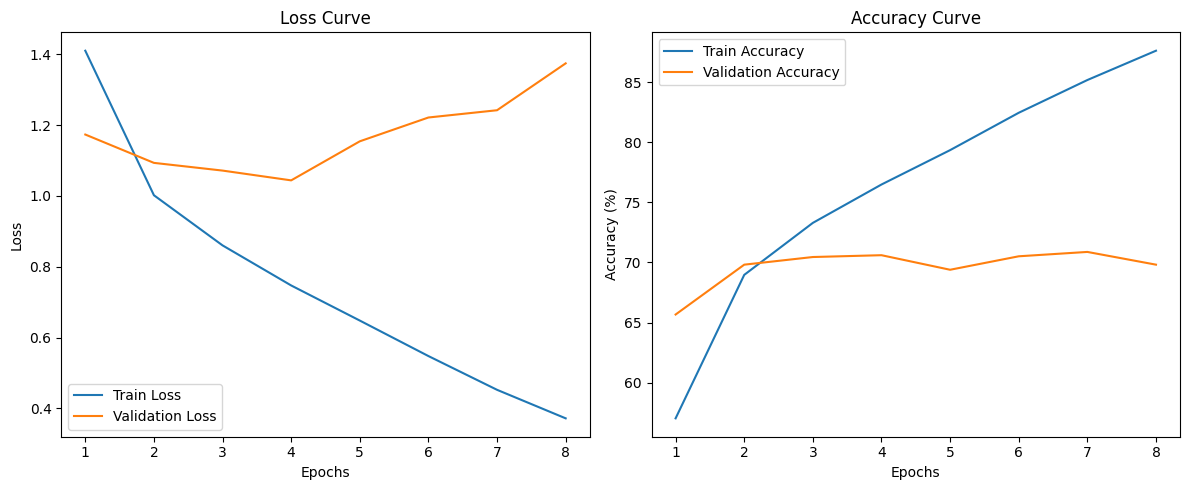

Test Loss: 1.4382, Test Accuracy: 68.64%


In [ ]:
# Ensure `target_names` aligns with unique labels in the validation set
unique_val_labels = sorted(set(val_labels))  # Get unique labels in validation set
filtered_label_to_index_val = {k: v for k, v in label_to_index.items() if label_to_index[k] in unique_val_labels}
target_names_val = [k for k, v in filtered_label_to_index_val.items()]

# # Print classification report for validation
# print("\nValidation Classification Report:")
# print(classification_report(val_labels, val_preds, labels=unique_val_labels, target_names=target_names_val))

# Plotting Loss and Accuracy
plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

# Test Evaluation
model.eval()
test_loss = 0.0
correct_preds = 0
total_preds = 0
test_preds = []
test_labels = []

with torch.no_grad():
    for embeddings, labels in test_loader:
        embeddings, labels = embeddings.to(device), labels.to(device)
        outputs = model(embeddings)
        loss = criterion(outputs, labels)
        test_loss += loss.item() * embeddings.size(0)
        _, predicted = torch.max(outputs, dim=1)
        correct_preds += (predicted == labels).sum().item()
        total_preds += labels.size(0)

        test_preds.extend(predicted.cpu().numpy())
        test_labels.extend(labels.cpu().numpy())

test_loss /= total_preds
test_accuracy = 100 * correct_preds / total_preds

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

# Ensure `target_names` aligns with unique labels in the test set
unique_test_labels = sorted(set(test_labels))  # Get unique labels in the test set
filtered_label_to_index_test = {k: v for k, v in label_to_index.items() if label_to_index[k] in unique_test_labels}
target_names_test = [k for k, v in filtered_label_to_index_test.items()]

# # Print classification report for test set
# print("\nTest Classification Report:")
# print(classification_report(test_labels, test_preds, labels=unique_test_labels, target_names=target_names_test))


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define BiDirectionalGRU Model
class BiDirectionalGRU(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(BiDirectionalGRU, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # Bi-directional GRU layer
        self.gru = nn.GRU(input_size, hidden_size, num_layers,
                          batch_first=True, bidirectional=True)

        # Fully connected layer
        self.fc = nn.Linear(hidden_size * 2, output_size)  # *2 for bidirectional output

    def forward(self, x):
        # Initialize hidden state
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_layers * 2, batch_size, self.hidden_size).to(x.device)  # 2 for bidirectional

        # Forward propagate GRU
        out, _ = self.gru(x, h0)

        # Decode the hidden state of the last time step
        out = self.fc(out[:, -1, :])  # Use the last time step's output (for classification)

        # Apply softmax to get probabilities for each class
        out = F.softmax(out, dim=1)  # Normalize output to be a probability distribution

        return out



# Initialize Model, Loss, Optimizer
input_dim = stacked_tensors_x.shape[2]  # Example: 768 (embedding size)
hidden_dim = 256
num_layers = 1
num_classes = 22  # Number of categories
modelGRU = BiDirectionalGRU(input_size=input_dim, hidden_size=hidden_dim, num_layers=num_layers, output_size=num_classes)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(modelGRU.parameters(), lr=1e-4)  # Example with GRU

# Training Loop
num_epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
modelGRU = modelGRU.to(device)  # Example with GRU

train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

def plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(12, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, 'bo-', label='Training Loss')
    plt.plot(epochs, val_losses, 'ro-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_accuracies, 'ro-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()

    plt.tight_layout()
    plt.show()

for epoch in range(num_epochs):
    modelGRU.train()  # Example with GRU
    train_loss = 0.0
    correct_preds = 0
    total_preds = 0

    for embeddings, labels in train_loader:
        embeddings, labels = embeddings.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = modelGRU(embeddings)  # Example with GRU
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * embeddings.size(0)  # Sum the loss across all samples
        _, predicted = torch.max(outputs, dim=1)
        correct_preds += (predicted == labels).sum().item()
        total_preds += labels.size(0)

    train_loss_percentage = (train_loss / total_preds) 
    train_accuracy = 100 * correct_preds / total_preds
    train_losses.append(train_loss_percentage)
    train_accuracies.append(train_accuracy)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss_percentage:.2f}, Accuracy: {train_accuracy:.2f}%")

    # Validation
    modelGRU.eval()  # Example with GRU
    val_loss = 0.0
    correct_preds = 0
    total_preds = 0

    all_labels = []
    all_preds = []

    with torch.no_grad():
        for embeddings, labels in val_loader:
            embeddings, labels = embeddings.to(device), labels.to(device)
            outputs = modelGRU(embeddings)  # Example with GRU
            loss = criterion(outputs, labels)
            val_loss += loss.item() * embeddings.size(0)  # Sum the loss across all samples
            _, predicted = torch.max(outputs, dim=1)
            correct_preds += (predicted == labels).sum().item()
            total_preds += labels.size(0)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    val_loss_percentage = (val_loss / total_preds) 
    val_accuracy = 100 * correct_preds / total_preds
    val_losses.append(val_loss_percentage)
    val_accuracies.append(val_accuracy)
    print(f"Validation Loss: {val_loss_percentage:.2f}, Validation Accuracy: {val_accuracy:.2f}%")

    # Metrics
    f1 = f1_score(all_labels, all_preds, average='weighted')
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    print(f"F1 Score: {f1:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")

    # # Confusion Matrix
    # cm = confusion_matrix(all_labels, all_preds)
    # plt.figure(figsize=(10, 8))
    # sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_to_index.keys(), yticklabels=label_to_index.keys())
    # plt.title('Confusion Matrix')
    # plt.xlabel('Predicted Labels')
    # plt.ylabel('True Labels')
    # plt.show()

plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies)


Epoch [1/10], Loss: 3.09, Accuracy: 4.44%
Validation Loss: 3.09, Validation Accuracy: 4.73%
F1 Score: 0.00, Precision: 0.00, Recall: 0.05


e:\MY projects\LangSHain\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [2/10], Loss: 3.09, Accuracy: 4.45%
Validation Loss: 3.09, Validation Accuracy: 4.33%
F1 Score: 0.00, Precision: 0.00, Recall: 0.04


e:\MY projects\LangSHain\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


KeyboardInterrupt: 

Epoch [1/30], Loss: 3.35, Accuracy: 37.81%
Validation Loss: 3.30, Validation Accuracy: 38.24%
F1 Score: 0.21, Precision: 0.15, Recall: 0.38


e:\MY projects\LangSHain\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [2/30], Loss: 3.30, Accuracy: 38.58%
Validation Loss: 3.30, Validation Accuracy: 38.24%
F1 Score: 0.21, Precision: 0.15, Recall: 0.38


e:\MY projects\LangSHain\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [3/30], Loss: 3.30, Accuracy: 38.58%
Validation Loss: 3.30, Validation Accuracy: 38.24%
F1 Score: 0.21, Precision: 0.15, Recall: 0.38


e:\MY projects\LangSHain\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [4/30], Loss: 3.30, Accuracy: 38.58%
Validation Loss: 3.30, Validation Accuracy: 38.24%
F1 Score: 0.21, Precision: 0.15, Recall: 0.38


e:\MY projects\LangSHain\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [5/30], Loss: 3.30, Accuracy: 38.58%
Validation Loss: 3.30, Validation Accuracy: 38.24%
F1 Score: 0.21, Precision: 0.15, Recall: 0.38


e:\MY projects\LangSHain\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [6/30], Loss: 3.30, Accuracy: 38.58%
Validation Loss: 3.30, Validation Accuracy: 38.24%
F1 Score: 0.21, Precision: 0.15, Recall: 0.38


e:\MY projects\LangSHain\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [7/30], Loss: 3.30, Accuracy: 38.58%
Validation Loss: 3.30, Validation Accuracy: 38.24%
F1 Score: 0.21, Precision: 0.15, Recall: 0.38


e:\MY projects\LangSHain\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [8/30], Loss: 3.30, Accuracy: 38.58%
Validation Loss: 3.30, Validation Accuracy: 38.24%
F1 Score: 0.21, Precision: 0.15, Recall: 0.38


e:\MY projects\LangSHain\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [9/30], Loss: 3.30, Accuracy: 38.58%
Validation Loss: 3.30, Validation Accuracy: 38.24%
F1 Score: 0.21, Precision: 0.15, Recall: 0.38


e:\MY projects\LangSHain\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [10/30], Loss: 3.30, Accuracy: 38.58%
Validation Loss: 3.30, Validation Accuracy: 38.24%
F1 Score: 0.21, Precision: 0.15, Recall: 0.38


e:\MY projects\LangSHain\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [11/30], Loss: 3.30, Accuracy: 38.58%
Validation Loss: 3.30, Validation Accuracy: 38.24%
F1 Score: 0.21, Precision: 0.15, Recall: 0.38


e:\MY projects\LangSHain\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [12/30], Loss: 3.30, Accuracy: 38.58%
Validation Loss: 3.30, Validation Accuracy: 38.24%
F1 Score: 0.21, Precision: 0.15, Recall: 0.38


e:\MY projects\LangSHain\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [13/30], Loss: 3.30, Accuracy: 38.58%
Validation Loss: 3.30, Validation Accuracy: 38.24%
F1 Score: 0.21, Precision: 0.15, Recall: 0.38


e:\MY projects\LangSHain\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [14/30], Loss: 3.30, Accuracy: 38.58%
Validation Loss: 3.30, Validation Accuracy: 38.24%
F1 Score: 0.21, Precision: 0.15, Recall: 0.38


e:\MY projects\LangSHain\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [15/30], Loss: 3.30, Accuracy: 38.58%
Validation Loss: 3.30, Validation Accuracy: 38.24%
F1 Score: 0.21, Precision: 0.15, Recall: 0.38


e:\MY projects\LangSHain\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [16/30], Loss: 3.30, Accuracy: 38.58%
Validation Loss: 3.30, Validation Accuracy: 38.24%
F1 Score: 0.21, Precision: 0.15, Recall: 0.38


e:\MY projects\LangSHain\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [17/30], Loss: 3.30, Accuracy: 38.58%
Validation Loss: 3.30, Validation Accuracy: 38.24%
F1 Score: 0.21, Precision: 0.15, Recall: 0.38


e:\MY projects\LangSHain\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [18/30], Loss: 3.30, Accuracy: 38.58%
Validation Loss: 3.30, Validation Accuracy: 38.24%
F1 Score: 0.21, Precision: 0.15, Recall: 0.38


e:\MY projects\LangSHain\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [19/30], Loss: 3.30, Accuracy: 38.58%
Validation Loss: 3.30, Validation Accuracy: 38.24%
F1 Score: 0.21, Precision: 0.15, Recall: 0.38


e:\MY projects\LangSHain\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [20/30], Loss: 3.30, Accuracy: 38.58%
Validation Loss: 3.30, Validation Accuracy: 38.24%
F1 Score: 0.21, Precision: 0.15, Recall: 0.38


e:\MY projects\LangSHain\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [21/30], Loss: 3.30, Accuracy: 38.58%
Validation Loss: 3.30, Validation Accuracy: 38.24%
F1 Score: 0.21, Precision: 0.15, Recall: 0.38


e:\MY projects\LangSHain\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [22/30], Loss: 3.30, Accuracy: 38.58%
Validation Loss: 3.30, Validation Accuracy: 38.24%
F1 Score: 0.21, Precision: 0.15, Recall: 0.38


e:\MY projects\LangSHain\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [23/30], Loss: 3.30, Accuracy: 38.58%
Validation Loss: 3.30, Validation Accuracy: 38.24%
F1 Score: 0.21, Precision: 0.15, Recall: 0.38


e:\MY projects\LangSHain\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [24/30], Loss: 3.30, Accuracy: 38.58%
Validation Loss: 3.30, Validation Accuracy: 38.24%
F1 Score: 0.21, Precision: 0.15, Recall: 0.38


e:\MY projects\LangSHain\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [25/30], Loss: 3.30, Accuracy: 38.58%
Validation Loss: 3.30, Validation Accuracy: 38.24%
F1 Score: 0.21, Precision: 0.15, Recall: 0.38


e:\MY projects\LangSHain\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [26/30], Loss: 3.30, Accuracy: 38.58%
Validation Loss: 3.30, Validation Accuracy: 38.24%
F1 Score: 0.21, Precision: 0.15, Recall: 0.38


e:\MY projects\LangSHain\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [27/30], Loss: 3.30, Accuracy: 38.58%
Validation Loss: 3.30, Validation Accuracy: 38.24%
F1 Score: 0.21, Precision: 0.15, Recall: 0.38


e:\MY projects\LangSHain\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [28/30], Loss: 3.30, Accuracy: 38.58%
Validation Loss: 3.30, Validation Accuracy: 38.24%
F1 Score: 0.21, Precision: 0.15, Recall: 0.38


e:\MY projects\LangSHain\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [29/30], Loss: 3.30, Accuracy: 38.58%
Validation Loss: 3.30, Validation Accuracy: 38.24%
F1 Score: 0.21, Precision: 0.15, Recall: 0.38


e:\MY projects\LangSHain\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [30/30], Loss: 3.30, Accuracy: 38.58%
Validation Loss: 3.30, Validation Accuracy: 38.24%
F1 Score: 0.21, Precision: 0.15, Recall: 0.38


e:\MY projects\LangSHain\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


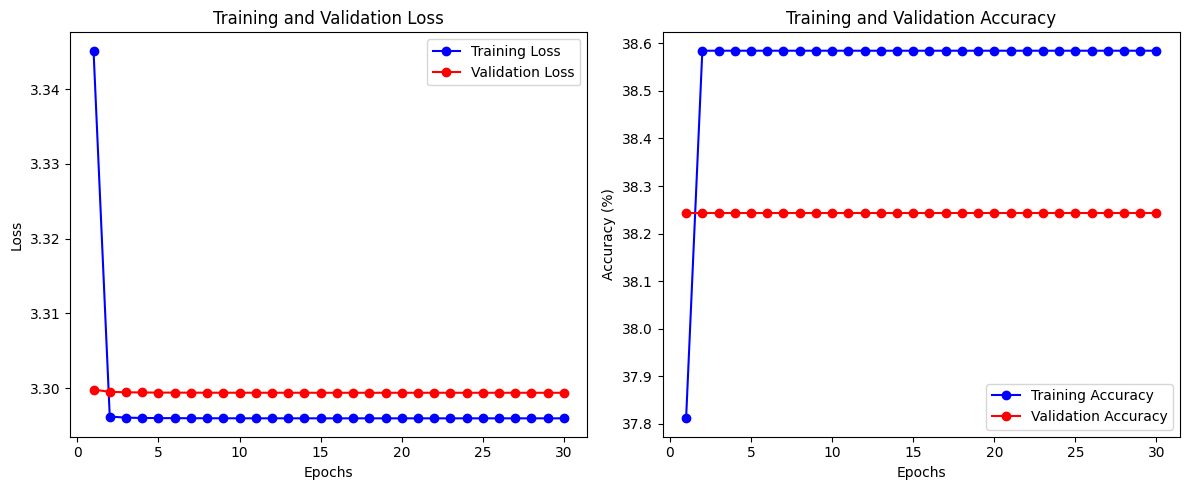

In [ ]:
# Define BiDirectionalLSTM Model
class BiDirectionalLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(BiDirectionalLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # Bi-directional LSTM layer
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers,
                            batch_first=True, bidirectional=True)

        # Fully connected layer
        self.fc = nn.Linear(hidden_size * 2, output_size)  # *2 for bidirectional output
        
    def forward(self, x):
        # Initialize hidden and cell states
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_layers * 2, batch_size, self.hidden_size).to(x.device)  # 2 for bidirectional
        c0 = torch.zeros(self.num_layers * 2, batch_size, self.hidden_size).to(x.device)

        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0))

        # Decode the hidden state of the last time step
        out = self.fc(out[:, -1, :])  # Use the last time step's output (for classification)

        # Apply softmax to get probabilities for each class
        out = F.softmax(out, dim=1)  # Normalize output to be a probability distribution

        return out

# Initialize Model, Loss, Optimizer
input_dim = stacked_tensors_x.shape[2]  # Example: 768 (embedding size)
hidden_dim = 256
num_layers = 1
num_classes = 22  # Number of categories

modelLSTM = BiDirectionalLSTM(input_size=input_dim, hidden_size=hidden_dim, num_layers=num_layers, output_size=num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(modelLSTM.parameters(), lr=1e-4)  

# Training Loop
num_epochs = 30
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
modelLSTM = modelLSTM.to(device)  

train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

def plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(12, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, 'bo-', label='Training Loss')
    plt.plot(epochs, val_losses, 'ro-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_accuracies, 'ro-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()

    plt.tight_layout()
    plt.show()

for epoch in range(num_epochs):
    modelLSTM.train()  # Example with GRU
    train_loss = 0.0
    correct_preds = 0
    total_preds = 0

    for embeddings, labels in train_loader:
        embeddings, labels = embeddings.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = modelLSTM(embeddings)  # Example with GRU
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * embeddings.size(0)  # Sum the loss across all samples
        _, predicted = torch.max(outputs, dim=1)
        correct_preds += (predicted == labels).sum().item()
        total_preds += labels.size(0)

    train_loss_percentage = (train_loss / total_preds) 
    train_accuracy = 100 * correct_preds / total_preds
    train_losses.append(train_loss_percentage)
    train_accuracies.append(train_accuracy)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss_percentage:.2f}, Accuracy: {train_accuracy:.2f}%")

    # Validation
    modelLSTM.eval()  # Example with GRU
    val_loss = 0.0
    correct_preds = 0
    total_preds = 0

    all_labels = []
    all_preds = []

    with torch.no_grad():
        for embeddings, labels in val_loader:
            embeddings, labels = embeddings.to(device), labels.to(device)
            outputs = modelLSTM(embeddings)  # Example with GRU
            loss = criterion(outputs, labels)
            val_loss += loss.item() * embeddings.size(0)  # Sum the loss across all samples
            _, predicted = torch.max(outputs, dim=1)
            correct_preds += (predicted == labels).sum().item()
            total_preds += labels.size(0)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    val_loss_percentage = (val_loss / total_preds) 
    val_accuracy = 100 * correct_preds / total_preds
    val_losses.append(val_loss_percentage)
    val_accuracies.append(val_accuracy)
    print(f"Validation Loss: {val_loss_percentage:.2f}, Validation Accuracy: {val_accuracy:.2f}%")

    # Metrics
    f1 = f1_score(all_labels, all_preds, average='weighted')
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    print(f"F1 Score: {f1:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")

    # # Confusion Matrix
    # cm = confusion_matrix(all_labels, all_preds)
    # plt.figure(figsize=(10, 8))
    # sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_to_index.keys(), yticklabels=label_to_index.keys())
    # plt.title('Confusion Matrix')
    # plt.xlabel('Predicted Labels')
    # plt.ylabel('True Labels')
    # plt.show()

plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies)


In [37]:
torch.save(model.state_dict(), "transformer_classifier6.pth")


In [64]:
num_classes = 22  # Should match the original training
model = TransformerClassifier(input_dim=768, num_classes=num_classes)
model.load_state_dict(torch.load("transformer_classifier6.pth"))
model.to(device)


TransformerClassifier(
  (transformer): TransformerEncoder(
    (layers): ModuleList(
      (0-5): 6 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (linear1): Linear(in_features=768, out_features=256, bias=True)
        (dropout): Dropout(p=0.5, inplace=False)
        (linear2): Linear(in_features=256, out_features=768, bias=True)
        (norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.5, inplace=False)
        (dropout2): Dropout(p=0.5, inplace=False)
      )
    )
  )
  (fc): Linear(in_features=768, out_features=22, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [75]:
num_classes = 35  # Should match the original training
model = TransformerClassifier(input_dim=768, num_classes=num_classes)
model.load_state_dict(torch.load("transformer_classifier2.pth"))
model.to(device)

TransformerClassifier(
  (transformer): TransformerEncoder(
    (layers): ModuleList(
      (0-5): 6 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (linear1): Linear(in_features=768, out_features=256, bias=True)
        (dropout): Dropout(p=0.5, inplace=False)
        (linear2): Linear(in_features=256, out_features=768, bias=True)
        (norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.5, inplace=False)
        (dropout2): Dropout(p=0.5, inplace=False)
      )
    )
  )
  (fc): Linear(in_features=768, out_features=35, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [76]:
def predict_category(input_text, tokenizer, embedding_model, classifier_model, categories, device):
    # Tokenize and generate embeddings
    tokens = tokenizer(input_text, return_tensors="pt", padding=True, truncation=True).to(device)
    embeddings = embedding_model(**tokens).last_hidden_state  # Assuming sequence embeddings
    embeddings = embeddings.mean(dim=1)  # Collapse sequence to a single vector

    # Add sequence dimension if needed
    embeddings = embeddings.unsqueeze(1)  # Shape: (batch_size, seq_len=1, input_dim)

    # Classify
    classifier_model.eval()
    with torch.no_grad():
        outputs = classifier_model(embeddings)
        _, predicted_idx = torch.max(outputs, dim=1)

    # Map the predicted index to the category name
    return categories[predicted_idx.item()]


In [77]:
categories = list(label_to_index.keys())

In [78]:
print(type(embedding_model))


<class 'transformers.models.bert.modeling_bert.BertModel'>


In [79]:
# Extract categories from label_to_index dictionary
categories = list(label_to_index.keys())

# Example: Print categories
print(categories)


['U.S. NEWS', 'COMEDY', 'PARENTING', 'WORLD NEWS', 'CULTURE & ARTS', 'TECH', 'SPORTS', 'ENTERTAINMENT', 'POLITICS', 'WEIRD NEWS', 'ENVIRONMENT', 'EDUCATION', 'CRIME', 'SCIENCE', 'WELLNESS', 'BUSINESS', 'STYLE & BEAUTY', 'FOOD & DRINK', 'MEDIA', 'QUEER VOICES', 'HOME & LIVING', 'WOMEN']


In [80]:
# Define the category names
categories = list(label_to_index.keys())  # Assuming this maps indices to category names

# Example 1: General Knowledge
input_text1 = "What are the latest advancements in artificial intelligence?"
predicted_category1 = predict_category(input_text1, tokenizer, embedding_model, model, categories, device)
print(f"Predicted category for input 1: {predicted_category1}")

# Example 2: Health and Wellness
input_text2 = "How can I improve my mental health through better sleep?"
predicted_category2 = predict_category(input_text2, tokenizer, embedding_model, model, categories, device)
print(f"Predicted category for input 2: {predicted_category2}")

# Example 3: Sports News
input_text3 = "Who won the last football world cup?"
predicted_category3 = predict_category(input_text3, tokenizer, embedding_model, model, categories, device)
print(f"Predicted category for input 3: {predicted_category3}")

# Example 4: Technology Trends
input_text4 = "Explain the concept of quantum computing and its applications."
predicted_category4 = predict_category(input_text4, tokenizer, embedding_model, model, categories, device)
print(f"Predicted category for input 4: {predicted_category4}")

# Example 5: Entertainment
input_text5 = "What are the most popular movies released this year?"
predicted_category5 = predict_category(input_text5, tokenizer, embedding_model, model, categories, device)
print(f"Predicted category for input 5: {predicted_category5}")

# Example 6: Personal Finance
input_text6 = "How do I start investing in the stock market as a beginner?"
predicted_category6 = predict_category(input_text6, tokenizer, embedding_model, model, categories, device)
print(f"Predicted category for input 6: {predicted_category6}")

# Example 7: Science and Research
input_text7 = "What are the implications of CRISPR in genetic engineering?"
predicted_category7 = predict_category(input_text7, tokenizer, embedding_model, model, categories, device)
print(f"Predicted category for input 7: {predicted_category7}")

# Example 8: Current Events
input_text8 = "What are the latest updates on the global climate crisis?"
predicted_category8 = predict_category(input_text8, tokenizer, embedding_model, model, categories, device)
print(f"Predicted category for input 8: {predicted_category8}")


Predicted category for input 1: TECH
Predicted category for input 2: TECH
Predicted category for input 3: WORLD NEWS
Predicted category for input 4: ENVIRONMENT
Predicted category for input 5: ENVIRONMENT
Predicted category for input 6: TECH
Predicted category for input 7: TECH
Predicted category for input 8: PARENTING


In [81]:
# Example 9: Travel and Tourism
input_text9 = "What are the best destinations to visit in 2024?"
predicted_category9 = predict_category(input_text9, tokenizer, embedding_model, model, categories, device)
print(f"Predicted category for input 9: {predicted_category9}")

# Example 10: Education
input_text10 = "How can I improve my study habits for better exam performance?"
predicted_category10 = predict_category(input_text10, tokenizer, embedding_model, model, categories, device)
print(f"Predicted category for input 10: {predicted_category10}")

# Example 11: Environment
input_text11 = "What are the key factors contributing to deforestation?"
predicted_category11 = predict_category(input_text11, tokenizer, embedding_model, model, categories, device)
print(f"Predicted category for input 11: {predicted_category11}")

# Example 12: Business and Entrepreneurship
input_text12 = "What are the latest trends in e-commerce for 2024?"
predicted_category12 = predict_category(input_text12, tokenizer, embedding_model, model, categories, device)
print(f"Predicted category for input 12: {predicted_category12}")

# Example 13: Food and Nutrition
input_text13 = "What are the health benefits of a plant-based diet?"
predicted_category13 = predict_category(input_text13, tokenizer, embedding_model, model, categories, device)
print(f"Predicted category for input 13: {predicted_category13}")

# Example 14: History
input_text14 = "What were the causes of the fall of the Roman Empire?"
predicted_category14 = predict_category(input_text14, tokenizer, embedding_model, model, categories, device)
print(f"Predicted category for input 14: {predicted_category14}")

# Example 15: Art and Culture
input_text15 = "How did the Impressionist movement change the art world?"
predicted_category15 = predict_category(input_text15, tokenizer, embedding_model, model, categories, device)
print(f"Predicted category for input 15: {predicted_category15}")

# Example 16: Politics
input_text16 = "What are the key issues in the upcoming presidential election?"
predicted_category16 = predict_category(input_text16, tokenizer, embedding_model, model, categories, device)
print(f"Predicted category for input 16: {predicted_category16}")


Predicted category for input 9: TECH
Predicted category for input 10: TECH
Predicted category for input 11: ENVIRONMENT
Predicted category for input 12: TECH
Predicted category for input 13: TECH
Predicted category for input 14: PARENTING
Predicted category for input 15: ENVIRONMENT
Predicted category for input 16: TECH


In [82]:
# Example usage
input_text = "What is happening in the world of finance?"
categories = list(label_to_index.keys())

# Assuming `tokenizer`, `embedding_model`, and `classifier_model` are already loaded
predicted_category = predict_category(input_text, tokenizer, embedding_model, model, categories, device)
print(f"Predicted category: {predicted_category}")

Predicted category: TECH


In [83]:
input_text = "Who won the Champions League this year?"
predicted_category = predict_category(input_text, tokenizer, embedding_model, model, categories, device)
print(f"Predicted category: {predicted_category}")


Predicted category: WORLD NEWS


In [84]:
input_text = "What are the latest advancements in artificial intelligence?"
predicted_category = predict_category(input_text, tokenizer, embedding_model, model, categories, device)
print(f"Predicted category: {predicted_category}")


Predicted category: TECH


In [85]:
from sentence_transformers import SentenceTransformer

In [87]:
model = SentenceTransformer('all-MiniLM-L6-v2')

In [88]:
sentence = "This is an example sentence"
ex_embedding = model.encode(sentence)

In [89]:
type(ex_embedding), ex_embedding.shape

(numpy.ndarray, (384,))

In [90]:
sentence_2 = "This is a different example sentence"
ex_embedding_2 = model.encode(sentence)
sim = model.similarity(ex_embedding, ex_embedding_2)
type(sim), sim

(torch.Tensor, tensor([[1.]]))

In [91]:
input_text = "What are the latest advancements in artificial intelligence?"
predicted_category = predict_category(input_text, tokenizer, embedding_model, model, categories, device)
print(f"Predicted category: {predicted_category}")

sentence = "This is an example sentence"
ex_embedding = model.encode(sentence)

sentence_2 = "This is a different example sentence"
ex_embedding_2 = model.encode(sentence)
sim = model.similarity(ex_embedding, ex_embedding_2)
type(sim), sim

IndexError: too many indices for tensor of dimension 3

In [92]:
input_text = "What are the latest advancements in artificial intelligence?"
predicted_category = predict_category(input_text, tokenizer, embedding_model, model, categories, device)
print(f"Predicted category: {predicted_category}")

# Compute embedding for input text
input_embedding = model.encode(input_text)

    # Filter articles by category
category_articles = [article for article in news if article['category'] == predicted_category]

    # Calculate similarity and store results
similarities = []
for article in category_articles:
    article_embedding = model.encode(article['headline'])
    similarity = cosine_similarity([input_embedding], [article_embedding])[0][0]
    similarities.append((article, similarity))

# Sort by similarity and select top N
sorted_articles = sorted(similarities, key=lambda x: x[1], reverse=True)
top_articles = [article for article, _ in sorted_articles[:top_n]]
print(top_articles)

IndexError: too many indices for tensor of dimension 3

In [197]:
embedded_sentences = [model.encode(text) for (text, cat) in text_cat_pairs]
print(embedded_sentences[42].shape)

(384,)


In [198]:
import numpy as np
embeddings = np.array(embedded_sentences)
embeddings.shape, embeddings.dtype

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


((22000, 384), dtype('float32'))

In [202]:
# use FAISS to create an index using IndexHNSWFlat with all embeddings in embedded_sentences

import faiss

# Create the index
d = embeddings.shape[1]  # Dimension of the embeddings
num_connections = 8 # number of connections each vertex will have
index = faiss.IndexHNSWFlat(d, num_connections)
index.add(embeddings)

In [203]:
index.ntotal

22000

In [204]:
text_cat_pairs[90][0]

'Puppy Starts House Fire, Sits On The Couch And Watches It All Burn || Los Alamos County Fire Department in New Mexico recommends that the pup should perhaps enroll in a youth firesetting intervention program.'

In [59]:
# reshape the embedding from (384,) to (1, 384)
embedding_reshaped = embeddings[42].astype('float32').reshape(1, -1)
embedding_reshaped.shape

(1, 384)

In [205]:
embedding_reshaped.dtype

dtype('float32')

In [61]:
# approximate nearest neighbor search
top_k = 4 # number of nearest neighbours to retrieve
D, I = index.search(embedding_reshaped, top_k)

for dist, index in zip(D[0], I[0]):
    print(f"Text at index {index} has distance {dist} to the input text.")

Text at index 42 has distance 0.0 to the input text.
Text at index 37 has distance 0.7410087585449219 to the input text.
Text at index 3192 has distance 0.9261242151260376 to the input text.
Text at index 5279 has distance 0.9268099069595337 to the input text.


In [62]:
for index in I[0]:
    print(text_cat_pairs[index])
    print()

("Racism Seen As Root Of Water Crisis In Mississippi Capital || A boil-water advisory has been lifted for Mississippi's capital, and the state will stop handing out free bottled water on Saturday.", 'U.S. NEWS')

('Privatization Isn’t The Answer To Jackson’s Water Crisis || Studies have repeatedly shown that ending public administration of water supplies doesn’t work — but that’s now on the table in Mississippi.', 'ENVIRONMENT')

('Some Electricity Restored In Texas, But Water Woes Grow || The crisis is far from over in parts of the South, where many people still lack safe drinking water.', 'U.S. NEWS')

('Mississippi Braces For More Rain As Hundreds Of Homes Flooded In Jackson Area || Gov. Tate Reeves has warned Mississippians that the state is “not in the clear yet.”', 'U.S. NEWS')



In [63]:
complete_text = "\n".join([text_cat_pairs[i][0] for i in I[0]])
print(complete_text)

Racism Seen As Root Of Water Crisis In Mississippi Capital || A boil-water advisory has been lifted for Mississippi's capital, and the state will stop handing out free bottled water on Saturday.
Privatization Isn’t The Answer To Jackson’s Water Crisis || Studies have repeatedly shown that ending public administration of water supplies doesn’t work — but that’s now on the table in Mississippi.
Some Electricity Restored In Texas, But Water Woes Grow || The crisis is far from over in parts of the South, where many people still lack safe drinking water.
Mississippi Braces For More Rain As Hundreds Of Homes Flooded In Jackson Area || Gov. Tate Reeves has warned Mississippians that the state is “not in the clear yet.”


In [64]:
prompt = "Summarize the following text:\n" + complete_text

In [65]:
from transformers import pipeline

summarizer = pipeline("summarization", "pszemraj/led-base-book-summary")

e:\MY projects\LangSHain\venv\lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Lenovo\.cache\huggingface\hub\models--pszemraj--led-base-book-summary. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [68]:
summary = summarizer(
    prompt,
    min_length=8,
    max_length=80,
    repetition_penalty=2.0,
    num_beams=4,
    temperature=1.5,
    top_k=30,
    top_p=0.5,
    do_sample=True,
    early_stopping=True,
)

In [69]:
summary

[{'summary_text': "A boil-water advisory has been lifted for Mississippi's capital, and the state will stop handing out free bottled water on Saturday. Gov. Tate Reeves warns Mississippians that privatization isn't the answer to Jackson's water crisis. Studies have repeatedly shown that ending public administration of water supplies doesn’t work - but that’s now on the table in Mississippi. Some electricity is"}]